In [24]:
import pandas as pd
import glob
import os
import warnings
import matplotlib.pyplot as plt
import matplotlib
from pandas.io.json import json_normalize
warnings.filterwarnings("ignore")
pd.set_option('display.max_colwidth', 200)

In [25]:
df1=pd.read_csv('Jan 2023.csv')
df2=pd.read_csv('Feb 2023.csv')
df3=pd.read_csv('March.csv')
order1=pd.read_csv('jan orders 23.csv')
order2=pd.read_csv('order feb 2023.csv')
order3=pd.read_csv('orders march 2023.csv')

In [26]:
order1.rename(columns={'id':'order_id'},inplace=True)
order2.rename(columns={'id':'order_id'},inplace=True)
order3.rename(columns={'id':'order_id'},inplace=True)

In [27]:
order1['name']=order1['notes'].str.split(',').str[0].str.split('"').str[3]
order1['email']=order1['notes'].str.split(',').str[1].str.split('"').str[3]


order2['name']=order2['notes'].str.split(',').str[0].str.split('"').str[3]
order2['email']=order2['notes'].str.split(',').str[1].str.split('"').str[3]


order3['name']=order3['notes'].str.split(',').str[0].str.split('"').str[3]
order3['email']=order3['notes'].str.split(',').str[1].str.split('"').str[3]


In [28]:
order1.drop(columns=['amount','amount_paid','amount_due','currency','receipt','offer_id','status','attempts','notes','created_at'],inplace=True)
order2.drop(columns=['amount','amount_paid','amount_due','currency','receipt','offer_id','status','attempts','notes','created_at'],inplace=True)
order3.drop(columns=['amount','amount_paid','amount_due','currency','receipt','offer_id','status','attempts','notes','created_at'],inplace=True)

In [29]:
combined_data1=pd.merge(df1,order1,on='order_id',how="left")
combined_data2=pd.merge(df2,order2,on='order_id',how="left")
combined_data3=pd.merge(df3,order3,on='order_id',how="left")

In [33]:
combined_data1 = pd.concat([combined_data1,combined_data2],ignore_index=True)
combined_data1 = pd.concat([combined_data1,combined_data3],ignore_index=True)
combined_data = combined_data1

In [36]:
combined_data1.isnull().sum()

payment page id           0
payment page title        0
payment date              1
order_id                  1
item name                 1
item amount               1
item quantity             1
item payment amount       0
total payment amount      1
currency                  1
payment status            1
payment id                1
name                    257
email                   257
dtype: int64

In [138]:
combined_data[combined_data['name']=='dinmeher']

,payment page id,payment page title,payment date,order_id,item name,item amount,item quantity,item payment amount(INR),total payment amount,currency,payment status,payment id,name,email


In [43]:
combined_data[combined_data['order_id'].isnull()]

,payment page id,payment page title,payment date,order_id,item name,item amount,item quantity,item payment amount,total payment amount,currency,payment status,payment id,name,email


In [42]:
combined_data.dropna(subset=['order_id'],inplace=True)

In [44]:
combined_data[combined_data['name'].isnull()]

,payment page id,payment page title,payment date,order_id,item name,item amount,item quantity,item payment amount,total payment amount,currency,payment status,payment id,name,email
411,pl_L9fF5d8pBQs7rz,FRUIT BASKET JANUARY 30,01/02/2023 11:41:58,order_LB4oL6Cd5JK9ID,STRAWBERRIES 1 BOX,200.0,1.0,200.0,1490.0,INR,captured,pay_LB4oWYayCnhiZe,NaN,NaN
412,pl_L9fF5d8pBQs7rz,FRUIT BASKET JANUARY 30,01/02/2023 11:41:58,order_LB4oL6Cd5JK9ID,AVOCADOS 2 PCS,675.0,1.0,675.0,1490.0,INR,captured,pay_LB4oWYayCnhiZe,NaN,NaN
413,pl_L9fF5d8pBQs7rz,FRUIT BASKET JANUARY 30,01/02/2023 11:41:58,order_LB4oL6Cd5JK9ID,BLUEBERRIES 2 BOX,600.0,1.0,600.0,1490.0,INR,captured,pay_LB4oWYayCnhiZe,NaN,NaN
414,pl_L9fF5d8pBQs7rz,FRUIT BASKET JANUARY 30,01/02/2023 11:41:58,order_LB4oL6Cd5JK9ID,Delivery,15.0,1.0,15.0,1490.0,INR,captured,pay_LB4oWYayCnhiZe,NaN,NaN
788,pl_LLVKtxfvSSCYjA,FRUIT BASKET MARCH 4,01/03/2023 14:33:27,order_LMCflpIHjmvNTL,NEW ZEALAND QUEEN APPLES 1KG,400.0,1.0,400.0,1095.0,INR,captured,pay_LMCh5RXy9TPvhN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1561,pl_LY7AzRb1PEpHAa,"DRYFRUITS, SEEDS, NUTS APR 10",11/04/2023 14:45:33,order_LcQniDYiQ2z4mm,PINE NUTS 100G,690.0,2.0,1380.0,2830.0,INR,captured,pay_LcQnnxHJBbg7WK,NaN,NaN
1562,pl_LY7AzRb1PEpHAa,"DRYFRUITS, SEEDS, NUTS APR 10",11/04/2023 17:24:55,order_LcTW0chbf0F27A,DRIED CRANBERRIES 500G,950.0,1.0,950.0,2720.0,INR,captured,pay_LcTW9mzdT4tMlB,NaN,NaN
1563,pl_LY7AzRb1PEpHAa,"DRYFRUITS, SEEDS, NUTS APR 10",11/04/2023 17:24:55,order_LcTW0chbf0F27A,GOLDEN RASINS 500G,500.0,1.0,500.0,2720.0,INR,captured,pay_LcTW9mzdT4tMlB,NaN,NaN
1564,pl_LY7AzRb1PEpHAa,"DRYFRUITS, SEEDS, NUTS APR 10",11/04/2023 17:24:55,order_LcTW0chbf0F27A,PINE NUTS 100G,690.0,1.0,690.0,2720.0,INR,captured,pay_LcTW9mzdT4tMlB,NaN,NaN


In [45]:
combined_data.rename(columns={'item payment amount':'item payment amount(INR) '},inplace=True)


In [46]:
combined_data_copy=combined_data.copy()

In [47]:
combined_data_copy.tail()

,payment page id,payment page title,payment date,order_id,item name,item amount,item quantity,item payment amount(INR),total payment amount,currency,payment status,payment id,name,email
1561,pl_LY7AzRb1PEpHAa,"DRYFRUITS, SEEDS, NUTS APR 10",11/04/2023 14:45:33,order_LcQniDYiQ2z4mm,PINE NUTS 100G,690.0,2.0,1380.0,2830.0,INR,captured,pay_LcQnnxHJBbg7WK,NaN,NaN
1562,pl_LY7AzRb1PEpHAa,"DRYFRUITS, SEEDS, NUTS APR 10",11/04/2023 17:24:55,order_LcTW0chbf0F27A,DRIED CRANBERRIES 500G,950.0,1.0,950.0,2720.0,INR,captured,pay_LcTW9mzdT4tMlB,NaN,NaN
1563,pl_LY7AzRb1PEpHAa,"DRYFRUITS, SEEDS, NUTS APR 10",11/04/2023 17:24:55,order_LcTW0chbf0F27A,GOLDEN RASINS 500G,500.0,1.0,500.0,2720.0,INR,captured,pay_LcTW9mzdT4tMlB,NaN,NaN
1564,pl_LY7AzRb1PEpHAa,"DRYFRUITS, SEEDS, NUTS APR 10",11/04/2023 17:24:55,order_LcTW0chbf0F27A,PINE NUTS 100G,690.0,1.0,690.0,2720.0,INR,captured,pay_LcTW9mzdT4tMlB,NaN,NaN
1565,pl_LY7AzRb1PEpHAa,"DRYFRUITS, SEEDS, NUTS APR 10",11/04/2023 17:24:55,order_LcTW0chbf0F27A,PECAN NUTS 200G,580.0,1.0,580.0,2720.0,INR,captured,pay_LcTW9mzdT4tMlB,NaN,NaN


### checking unique values and their count in each columns

In [48]:
combined_data_copy['payment page id'].nunique()

55

In [49]:
combined_data_copy['payment page id'].value_counts()

pl_LY7512QtLhD6PS    81
pl_L42AqPWtHYzgd6    70
pl_LIEGxi519sf5vW    65
pl_L1FnNWclBbwmWt    59
pl_LY79xAIHRTdwp6    58
pl_LY78jy2CdBAqXN    56
pl_LUpMNTGqQzhv2d    55
pl_LNtBVPTSY3AYj4    50
pl_L9ffMq6myWa6Gy    49
pl_KzA6Gj4yDsgd9B    49
pl_L1XDmuH6ffVOIq    46
pl_LFUxCdB0XpqoSA    42
pl_LY73b5MB2U0zre    42
pl_LCKCQt39HdY88H    40
pl_LT0SvLAmJtgU7F    39
pl_LUpP1CyqDlA2pz    38
pl_L78Sb4V8WqjxdI    38
pl_LUr491RrbcdgM6    38
pl_LIEHfIcLaAW34t    37
pl_L78RVW2oHyG4UU    35
pl_LL9TDOnGYEXMlA    33
pl_LFUzFUQaSPn35H    33
pl_LVLibrBCoAOON0    33
pl_LVLk6qAX6fuZNy    30
pl_KzA7oe3nyH72kE    28
pl_LVLjLWjg2K1nJv    28
pl_LQUC2hjrdoWXk4    28
pl_LPlSDDhadzfvYs    27
pl_LXIuXwgqNMOwCy    26
pl_LOrv1jOesWWJp8    24
pl_L1j2koeQUGNwjc    24
pl_LXJGIJdml5ePIG    23
pl_L9fF5d8pBQs7rz    23
pl_KzC9yGe1vB8s1R    20
pl_LLVKtxfvSSCYjA    20
pl_L8NlH7Nr8zWtAP    17
pl_LIJK2HO6pOEfUi    17
pl_LRha2NUBfOKwQR    16
pl_L42BKUwbO8bXHh    15
pl_LD2HLu3MWmK31P    14
pl_LQUZVwgRjUhtqw    12
pl_LVLkyAhTfWqWL

In [50]:
combined_data_copy['payment page title'].nunique()

55

In [51]:
combined_data_copy['payment page title'].value_counts()

FORM 1 VEGETABLES APRIL 4                81
FRUIT BASKET JANUARY 16                  70
FRUIT BASKET FEBRUARY 27                 65
FRUIT BASKET JANUARY 9                   59
SALADS, EXOTIC VEGETABLES APRIL 4        58
FORM 2 VEGETABLES APRIL 4                56
FORM 1 VEGETABLES MARCH 24               55
FRUIT BASKET MARCH 11                    50
SALADS, EXOTIC VEGETABLES JANUARY 31     49
SALADS, EXOTIC VEGETABLES JANURAY 3      49
SALADS, EXOTIC VEGETABLES JANUARY 10     46
FRUIT BASKET FEBRUARY 18                 42
FRUIT BASKET APRIL 3                     42
FRUIT BASKET FEBRUARY 11                 40
FRUIT BASKET MARCH 22                    39
FORM 2 LEAFY MARCH 24                    38
FRUIT BASKET JANUARY 23                  38
SALADS, EXOTIC VEGETABLES MARCH 28       38
SALADS, EXOTIC VEGETABLES FEBRUARY 24    37
SALADS, EXOTIC VEGETABLES JANUARY 24     35
SALADS, EXOTIC VEGETABLES FEBRUARY 28    33
SALADS, EXOTIC VEGETABLES FEBRUARY 17    33
FRUIT BASKET MARCH 28           

In [52]:
combined_data_copy['order_id'].nunique()

270

In [53]:
combined_data_copy['payment id'].nunique()

282

In [56]:
df=combined_data_copy.groupby('order_id')['payment id'].nunique().reset_index()
failed_duplets=list(df[df['payment id']>1]['order_id'])
for i in failed_duplets:
    print(combined_data_copy[combined_data_copy['order_id']==i])

       payment page id       payment page title         payment date  \
227  pl_L42AqPWtHYzgd6  FRUIT BASKET JANUARY 16  16/01/2023 09:31:39   
228  pl_L42AqPWtHYzgd6  FRUIT BASKET JANUARY 16  16/01/2023 09:31:39   
229  pl_L42AqPWtHYzgd6  FRUIT BASKET JANUARY 16  16/01/2023 09:31:39   
230  pl_L42AqPWtHYzgd6  FRUIT BASKET JANUARY 16  16/01/2023 09:31:39   
231  pl_L42AqPWtHYzgd6  FRUIT BASKET JANUARY 16  16/01/2023 09:31:39   
232  pl_L42AqPWtHYzgd6  FRUIT BASKET JANUARY 16  16/01/2023 09:31:39   
233  pl_L42AqPWtHYzgd6  FRUIT BASKET JANUARY 16  16/01/2023 09:29:54   
234  pl_L42AqPWtHYzgd6  FRUIT BASKET JANUARY 16  16/01/2023 09:29:54   
235  pl_L42AqPWtHYzgd6  FRUIT BASKET JANUARY 16  16/01/2023 09:29:54   
236  pl_L42AqPWtHYzgd6  FRUIT BASKET JANUARY 16  16/01/2023 09:29:54   
237  pl_L42AqPWtHYzgd6  FRUIT BASKET JANUARY 16  16/01/2023 09:29:54   
238  pl_L42AqPWtHYzgd6  FRUIT BASKET JANUARY 16  16/01/2023 09:29:54   

                 order_id           item name  item amount  ite

In [57]:
values_to_drop = ['pay_L4i18bFgRP0fwL','pay_L7T9Q8sIfqdIK1','pay_LAFO2ZDdXZqEFp','pay_LAFn81UkdLjEVr','pay_LAInJzfAU387H2','pay_LIMGegerF1HMq1','pay_LUqIMLy2fO2pzr','pay_LUvsd49Yc5Itaz','pay_LXE2GgLFFZUL3l','pay_LZJWgSvAQc1gCS','pay_LZxtNQumNMNGY3','pay_LZxtUuQsPr4hEh']

# Drop rows where Gender column has values in the list
combined_data_copy = combined_data_copy[~combined_data_copy['payment id'].isin(values_to_drop)]

In [58]:
df=combined_data_copy.groupby('order_id')['payment id'].nunique().reset_index()
df[df['payment id']>1]



,order_id,payment id


In [59]:
combined_data_copy['item name'].unique()

array(['BROCCOLI 1PC', 'DELIVERY', 'PURPLE CABBAGE 1 PC', 'S ROMAINE',
       'RED YELLOW CAPSICUM 1PC', 'S SWISS CHARD', 'S CURL KALE',
       'S SPICY MIX', 'IMPORTED BLUEBERRIES 2PUNNETS',
       'ICEBERG LETTUCE 1 PC', 'CELERY 250G', 'BABYCORN 1PACK',
       'S LETTUCE MIX', 'S SUMMERCRISP', 'AVOCADOS 2 pcs',
       'CHERRY TOMATOES 250G', 'S ARAGULA', 'S BUTTERHEAD',
       'BUTTON WHITE MUSHROOM 2PACKS', 'JAPANESE CUCUMBER 500G',
       'AVOCADOS 2 PCS', 'NAGPUR ORANGES 1KG', 'Delivery',
       'DESI PAPAYA 1PC', 'REGULAR BANANA 1 DOZ', 'POMEGRANATE 1KG',
       'INDIAN APPLES 1KG', 'STRAWBERRIES 1 BOX', 'BLUEBERRIES 2 BOX',
       'SITAFAL 1KG', 'MOSUMBI LOCAL 1kg', 'MALTA ORANGES 1KG',
       'KIWI BOX', 'MUSKMELON 1PC', 'MAMRA BADAM 500G',
       'PLAIN PISTA 500G', 'CASHEWS 500G', 'BRAZIL NUTS 200G',
       'PRUNES 250G', 'PECAN NUTS 200G', 'WALNUTS 500G',
       'PREMIUM ALMONDS 500G', 'DRIED CRANBERRIES 500G',
       'GOLDEN RASINS 500G', 'JUMBO ANJEER 500G', 'HONEY AWLA 50

In [60]:
combined_data_copy['item name'].value_counts()

Delivery                            102
DELIVERY                             86
POMEGRANATE 1KG                      43
STRAWBERRIES 1 BOX                   40
S LETTUCE MIX                        37
                                   ... 
RED AMARANTHUS 200G                   1
PAIREE MANGOES 1 DOZ                  1
Brinjal Stripes Kateri 500g           1
RED CHERRY TOMATOES PREMIUM 250G      1
SUMMERCRISP 100G                      1
Name: item name, Length: 147, dtype: int64

In [61]:
combined_data_copy['name'].nunique()

81

In [62]:
combined_data_copy['payment status'].nunique()

2

In [63]:
combined_data_copy['payment status'].value_counts()

captured    1117
failed       374
Name: payment status, dtype: int64

In [64]:
combined_data_copy['name'].nunique()

81

In [65]:
combined_data_copy['email'].nunique()

58

In [66]:
combined_data_copy['name'].value_counts()

Indrani Jafar                  87
Yogesh Thakkar                 68
Michelle Baptist               68
JASMA KAPADIA                  63
Anubha                         51
                               ..
Anindita Guha Maulik Rungta     2
Ranjana                         2
Ritu Sinha                      2
Manisha                         2
Noyna Dutt                      1
Name: name, Length: 81, dtype: int64

In [67]:
combined_data_copy['item quantity'].value_counts()

1.0    1294
2.0     167
3.0      14
4.0      13
5.0       2
9.0       1
Name: item quantity, dtype: int64

#### cheching null value count

In [68]:
combined_data_copy.isnull().sum()

payment page id                0
payment page title             0
payment date                   0
order_id                       0
item name                      0
item amount                    0
item quantity                  0
item payment amount(INR)       0
total payment amount           0
currency                       0
payment status                 0
payment id                     0
name                         237
email                        237
dtype: int64

#### Droping apartment-no ,apartment and currency column

In [69]:
combined_data_copy.drop(columns=['currency'],inplace=True)

In [70]:
(combined_data_copy['payment status'].value_counts()/len(combined_data_copy))*100

captured    74.916164
failed      25.083836
Name: payment status, dtype: float64

In [71]:
combined_data_payment_completed=combined_data_copy

we can drop payment page id column and seggregte titles of item

In [72]:
combined_data_payment_completed.drop(columns=['payment page id'],inplace=True)

In [73]:
#removing payment id as we can get the desired information from orderid
combined_data_payment_completed.drop(columns=['payment id'],inplace=True)

In [74]:
#removing status as we only have successful payments now
combined_data_payment_completed.drop(columns=['payment status'],inplace=True)

In [89]:
dryfruits=combined_data_payment_completed['payment page title'].str.startswith('DRYFRUITS, SEEDS, NUTS')
combined_data_payment_completed.loc[dryfruits,'payment page title']='DRYFRUITS, SEEDS, NUTS'

fruits=combined_data_payment_completed['payment page title'].str.startswith('FRUIT BASKET')
combined_data_payment_completed.loc[fruits,'payment page title']='FRUIT BASKET'

exotic_vegies=combined_data_payment_completed['payment page title'].str.startswith('SALADS, EXOTIC VEGETABLES')
combined_data_payment_completed.loc[exotic_vegies,'payment page title']='SALADS, EXOTIC VEGETABLES'

vegies=combined_data_payment_completed['payment page title'].str.startswith('FORM')
combined_data_payment_completed.loc[vegies,'payment page title']='VEGETABLES'

herbs=combined_data_payment_completed['payment page title'].str.startswith('HERBS & SALADS')
combined_data_payment_completed.loc[herbs,'payment page title']='HERBS & SALADS'

In [90]:
#seggregating payment page title
combined_data_payment_completed['payment page title'].value_counts()


FRUIT BASKET                 581
SALADS, EXOTIC VEGETABLES    424
VEGETABLES                   333
DRYFRUITS, SEEDS, NUTS       140
HERBS & SALADS                13
Name: payment page title, dtype: int64

In [91]:
combined_data_payment_completed.columns

Index(['payment page title', 'payment date', 'order_id', 'item name',
       'item amount', 'item quantity', 'item payment amount(INR) ',
       'total payment amount', 'name', 'email', 'date', 'time', 'year', 'day',
       'month'],
      dtype='object')

In [92]:
combined_data_payment_completed['payment date'].value_counts()

24/01/2023 12:22:21    25
24/01/2023 12:35:18    20
03/04/2023 07:39:24    15
27/03/2023 09:23:20    15
03/04/2023 07:41:31    15
                       ..
27/03/2023 10:21:54     1
27/01/2023 10:16:45     1
19/02/2023 20:02:47     1
04/01/2023 12:25:17     1
28/03/2023 17:18:32     1
Name: payment date, Length: 270, dtype: int64

In [93]:

combined_data_payment_completed['payment date']=combined_data_payment_completed['payment date'].astype(str)


In [94]:
combined_data_payment_completed['date']=combined_data_payment_completed['payment date'].str.split().str[0]

In [95]:
combined_data_payment_completed['time']=combined_data_payment_completed['payment date'].str.split().str[1]

In [96]:
combined_data_payment_completed['year']=combined_data_payment_completed['date'].str.split('/').str[2].astype(int)
combined_data_payment_completed['day']=combined_data_payment_completed['date'].str.split('/').str[0].astype(int)
combined_data_payment_completed['month']=combined_data_payment_completed['date'].str.split('/').str[1].astype(int)

In [97]:
combined_data_payment_completed['date'] = pd.to_datetime(combined_data_payment_completed[['year', 'month', 'day']])


In [98]:
combined_data_payment_completed['name'] = combined_data_payment_completed['name'].str.strip().str.lower()

In [99]:
combined_data_payment_completed['item name'] = combined_data_payment_completed['item name'].str.strip().str.lower()
combined_data_payment_completed['email'] = combined_data_payment_completed['email'].str.strip().str.lower()

In [105]:
combined_data_payment_completed[combined_data_payment_completed['name'].isnull()]

,payment page title,payment date,order_id,item name,item amount,item quantity,item payment amount(INR),total payment amount,name,email,date,time,year,day,month
411,FRUIT BASKET,01/02/2023 11:41:58,order_LB4oL6Cd5JK9ID,strawberries 1 box,200.0,1.0,200.0,1490.0,NaN,NaN,2023-02-01,11:41:58,2023,1,2
412,FRUIT BASKET,01/02/2023 11:41:58,order_LB4oL6Cd5JK9ID,avocados 2 pcs,675.0,1.0,675.0,1490.0,NaN,NaN,2023-02-01,11:41:58,2023,1,2
413,FRUIT BASKET,01/02/2023 11:41:58,order_LB4oL6Cd5JK9ID,blueberries 2 box,600.0,1.0,600.0,1490.0,NaN,NaN,2023-02-01,11:41:58,2023,1,2
414,FRUIT BASKET,01/02/2023 11:41:58,order_LB4oL6Cd5JK9ID,delivery,15.0,1.0,15.0,1490.0,NaN,NaN,2023-02-01,11:41:58,2023,1,2
788,FRUIT BASKET,01/03/2023 14:33:27,order_LMCflpIHjmvNTL,new zealand queen apples 1kg,400.0,1.0,400.0,1095.0,NaN,NaN,2023-03-01,14:33:27,2023,1,3
789,FRUIT BASKET,01/03/2023 14:33:27,order_LMCflpIHjmvNTL,strawberries 1 box,200.0,1.0,200.0,1095.0,NaN,NaN,2023-03-01,14:33:27,2023,1,3
790,FRUIT BASKET,01/03/2023 14:33:27,order_LMCflpIHjmvNTL,watermelon,155.0,1.0,155.0,1095.0,NaN,NaN,2023-03-01,14:33:27,2023,1,3
791,FRUIT BASKET,01/03/2023 14:33:27,order_LMCflpIHjmvNTL,delivery,15.0,1.0,15.0,1095.0,NaN,NaN,2023-03-01,14:33:27,2023,1,3
792,FRUIT BASKET,01/03/2023 14:33:27,order_LMCflpIHjmvNTL,flame red grapes 1 kg,325.0,1.0,325.0,1095.0,NaN,NaN,2023-03-01,14:33:27,2023,1,3


In [102]:
combined_data_payment_completed=combined_data_payment_completed[combined_data_payment_completed['date']<'2023-04-1']

In [116]:
df = pd.DataFrame(combined_data_payment_completed)
df_grouped = df.groupby('name')['email'].first().reset_index()
df_grouped = df_grouped.sort_values(by="name", ascending=True)




df_grouped.head(60)


,name,email
0,abha mehta,abhamehta26@gmail.com
1,ami gumashta,amigumashta69@gmail.com
2,amirbanu virji,ajvirji@gmail.com
3,aniish,anish24@gmail.com
4,anindita guha maulik rungta,guhamaulik@hotmail.com
5,anish shah,anish24@gmail.com
6,anju c,anish24@gmail.com
7,anubha,sawhney.anubha@gmail.com
8,archana swami,archanaswami@hotmail.com
9,asha gopalakrishnan,ashagopalakrishnan@hotmail.com


In [114]:
row_index = combined_data_payment_completed[combined_data_payment_completed['name'] == 'padmasree'].index

# Update the value of the 'Email' column in the specified row
combined_data_payment_completed.loc[row_index, 'name'] = 'padmashree'

row_index = combined_data_payment_completed[combined_data_payment_completed['name'] == 'neetu'].index

# Update the value of the 'Email' column in the specified row
combined_data_payment_completed.loc[row_index, 'name'] = 'neetu vinayek'

row_index = combined_data_payment_completed[combined_data_payment_completed['name'] == 'namita'].index
combined_data_payment_completed.loc[row_index, 'name'] = 'namita sahni'

row_index = combined_data_payment_completed[combined_data_payment_completed['name'] == 'kanchan'].index
combined_data_payment_completed.loc[row_index, 'name'] = 'kanchan samtani'

row_index = combined_data_payment_completed[combined_data_payment_completed['name'] == 'coleen'].index
combined_data_payment_completed.loc[row_index, 'name'] = 'collen'

row_index = combined_data_payment_completed[combined_data_payment_completed['name'] == 'coolen'].index
combined_data_payment_completed.loc[row_index, 'name'] = 'collen'

row_index = combined_data_payment_completed[combined_data_payment_completed['name'] == 'dinmeher'].index
combined_data_payment_completed.loc[row_index, 'name'] = 'dinmeher bunshah'

row_index = combined_data_payment_completed[combined_data_payment_completed['name'] == 'ashish bilimoria'].index
combined_data_payment_completed.loc[row_index, 'name'] = 'ashish billimoria'


In [52]:
# merged_df = pd.merge(combined_data_payment_completed,df_grouped, on='email', how='left')
# merged_df['name_x'].update(merged_df['name_y'])

# merged_df['name']=merged_df['name_x']

# combined_data_payment_completed=merged_df.drop(columns=['name_x','name_y'])

In [117]:
combined_data_payment_completed['email'].nunique()

54

In [118]:
print("Total number of item bought by individuals")
combined_data_payment_completed['name'].value_counts().reset_index(name='number of item purchased(not unique)')

Total number of item bought by individuals


,index,number of item purchased(not unique)
0,parul kumar,102
1,indrani jafar,87
2,naina,76
3,michelle baptist,68
4,yogesh thakkar,68
...,...,...
56,shweta,2
57,anindita guha maulik rungta,2
58,ritu sinha,2
59,ranjana,2


In [119]:
categories=combined_data_payment_completed['payment page title'].unique()
categories_sales=dict()
for category in categories:
    categories_sales[category]=combined_data_payment_completed[combined_data_payment_completed['payment page title']==category]['item payment amount(INR) '].sum()

df = pd.DataFrame(categories_sales.items(), columns=["Category Name", "Amount"])
df_sorted = df.sort_values(by="Amount", ascending=False)
display(df_sorted)
 

,Category Name,Amount
1,FRUIT BASKET,165592.0
2,"DRYFRUITS, SEEDS, NUTS",120995.0
0,"SALADS, EXOTIC VEGETABLES",41282.0
4,VEGETABLES,8754.0
3,HERBS & SALADS,1710.0


In [120]:
items_amount=combined_data_payment_completed.groupby('item name')['item payment amount(INR) ','item quantity'].sum().reset_index()
items_amount.sort_values(by='item payment amount(INR) ', ascending=False)

,item name,item payment amount(INR),item quantity
135,walnuts 500g,31185.0,27.0
34,devghad hapus 1doz,29420.0,18.0
6,avocados 2 pcs,19360.0,28.0
16,blueberries 2 box,18600.0,31.0
94,pomegranate 1kg,15050.0,43.0
...,...,...,...
37,dill leaves sepu bunch,25.0,1.0
28,chilli bhaji 250g,20.0,1.0
30,curry leaves,20.0,1.0
54,green chilli 100 gm,18.0,1.0


In [121]:
# Sort the DataFrame by date in descending order
df_sorted = combined_data_payment_completed.sort_values(by='date', ascending=False)

# Drop duplicates based on email column, keeping the first occurrence (most recent date)
df_unique = df_sorted.drop_duplicates(subset='email', keep='first')

# Create the DataFrame with 'name', 'email', and 'most_recent_date' columns
df_most_recent = df_unique[['name', 'email', 'date']].rename(columns={'date': 'Most_recent_Purchase_date'})
current_date=combined_data_payment_completed['date'].max()
# Print the resulting DataFrame
df_most_recent['Number of days after Purchase']=current_date-df_most_recent['Most_recent_Purchase_date']
df_most_recent


,name,email,Most_recent_Purchase_date,Number of days after Purchase
1318,ruchi wahi,wahiruchi80@gmail.com,2023-03-30,0 days
1286,aniish,anish24@gmail.com,2023-03-30,0 days
1177,shwetha kallaje,shwethakallaje@gmail.com,2023-03-30,0 days
1260,ritu sinha,rituarchit2@gmail.com,2023-03-29,1 days
1196,michelle baptist,michbaptist@gmail.com,2023-03-29,1 days
1193,parul kumar,2014parulkumar@gmail.com,2023-03-29,1 days
1262,minu agrawal,minuagrawal0707@gmail.com,2023-03-29,1 days
1267,ami gumashta,amigumashta69@gmail.com,2023-03-29,1 days
1178,noyna dutt,noynadutt@gmail.com,2023-03-28,2 days
1179,indrani jafar,ani.doley@gmail.com,2023-03-28,2 days


Text(0.5, 1.0, 'Customers most recent purchase by Date')

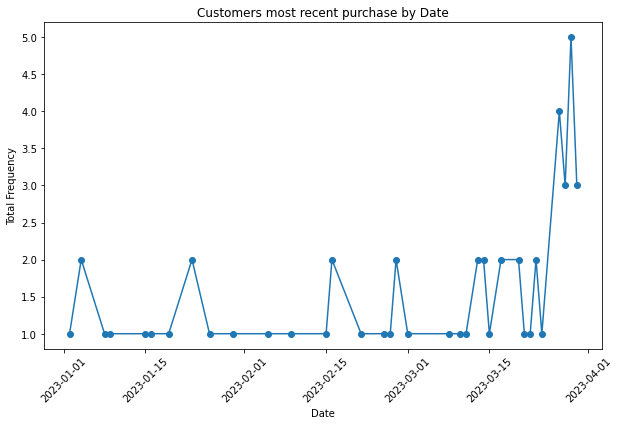

In [122]:
df_freq=df_most_recent.groupby('Most_recent_Purchase_date')['name'].size().reset_index()
# Create a scatter plot or line plot
plt.figure(figsize=(10, 6)) 

# Line plot
plt.plot(df_freq['Most_recent_Purchase_date'], df_freq['name'], marker='o')
plt.xlabel('Date')
plt.ylabel('Total Frequency')
plt.xticks(rotation=45)
plt.title('Customers most recent purchase by Date')

In [123]:
# Sort the DataFrame by date in descending order
df_sorted = combined_data_payment_completed.sort_values(by='date', ascending=True)

# Drop duplicates based on email column, keeping the first occurrence (most recent date)
df_unique = df_sorted.drop_duplicates(subset='email', keep='first')

# Create the DataFrame with 'name', 'email', and 'most_recent_date' columns
df_oldest_date = df_unique[['name', 'email', 'date']].rename(columns={'date': 'oldest_Purchase_date'})
# Print the resulting DataFrame
df_oldest_date

,name,email,oldest_Purchase_date
0,kerbi patel,kerbipatel66@gmail.com,2023-01-02
27,ashish billimoria,billimoriaash@gmail.com,2023-01-02
32,jasma kapadia,jasmak999@yahoo.com,2023-01-02
35,dinmeher bunshah,anish24@gmail.com,2023-01-02
39,michelle baptist,michbaptist@gmail.com,2023-01-02
44,indrani jafar,ani.doley@gmail.com,2023-01-02
23,meenal,rishabh@earthharvests.com,2023-01-02
6,trupti,tmaskai5@gmail.com,2023-01-02
19,kanchan samtani,samtani.kanchan@bcg.com,2023-01-02
60,yogesh thakkar,yogesh.thakkar@gmail.com,2023-01-03


In [124]:
name_amount=combined_data_payment_completed.groupby('name')['item payment amount(INR) '].sum().reset_index()
name_amount=name_amount.sort_values(by='item payment amount(INR) ',ascending=False).reset_index()
name_amount.drop(columns='index',inplace=True)
name_amount.head(10)

,name,item payment amount(INR)
0,yogesh thakkar,29667.0
1,jasma kapadia,27840.0
2,indrani jafar,24328.0
3,parul kumar,21727.0
4,michelle baptist,19109.0
5,anubha,18926.0
6,padmashree,17642.0
7,charu thapar,15935.0
8,sonavi desai,13189.0
9,naina,11390.0


In [136]:
combined_data_payment_completed[combined_data_payment_completed['name']=='dinmeher bunshah']

,payment page title,payment date,order_id,item name,item amount,item quantity,item payment amount(INR),total payment amount,name,email,date,time,year,day,month
35,"SALADS, EXOTIC VEGETABLES",02/01/2023 12:00:23,order_KzD6HfDYTzzx8W,s lettuce mix,110.0,1.0,110.0,345.0,dinmeher bunshah,anish24@gmail.com,2023-01-02,12:00:23,2023,2,1
36,"SALADS, EXOTIC VEGETABLES",02/01/2023 12:00:23,order_KzD6HfDYTzzx8W,delivery,15.0,1.0,15.0,345.0,dinmeher bunshah,anish24@gmail.com,2023-01-02,12:00:23,2023,2,1
37,"SALADS, EXOTIC VEGETABLES",02/01/2023 12:00:23,order_KzD6HfDYTzzx8W,s butterhead,110.0,1.0,110.0,345.0,dinmeher bunshah,anish24@gmail.com,2023-01-02,12:00:23,2023,2,1
38,"SALADS, EXOTIC VEGETABLES",02/01/2023 12:00:23,order_KzD6HfDYTzzx8W,s spicy mix,110.0,1.0,110.0,345.0,dinmeher bunshah,anish24@gmail.com,2023-01-02,12:00:23,2023,2,1
162,"SALADS, EXOTIC VEGETABLES",09/01/2023 16:42:15,order_L23ds8yz4qxs3J,delivery,15.0,1.0,15.0,345.0,dinmeher bunshah,anish24@gmail.com,2023-01-09,16:42:15,2023,9,1
163,"SALADS, EXOTIC VEGETABLES",09/01/2023 16:42:15,order_L23ds8yz4qxs3J,s spicy mix,110.0,1.0,110.0,345.0,dinmeher bunshah,anish24@gmail.com,2023-01-09,16:42:15,2023,9,1
164,"SALADS, EXOTIC VEGETABLES",09/01/2023 16:42:15,order_L23ds8yz4qxs3J,s summercrisp,110.0,1.0,110.0,345.0,dinmeher bunshah,anish24@gmail.com,2023-01-09,16:42:15,2023,9,1
165,"SALADS, EXOTIC VEGETABLES",09/01/2023 16:42:15,order_L23ds8yz4qxs3J,s lettuce mix,110.0,1.0,110.0,345.0,dinmeher bunshah,anish24@gmail.com,2023-01-09,16:42:15,2023,9,1
706,"SALADS, EXOTIC VEGETABLES",23/02/2023 12:44:55,order_LJndaIpHfTY5oH,s lettuce mix,110.0,1.0,110.0,345.0,dinmeher bunshah,anish24@gmail.com,2023-02-23,12:44:55,2023,23,2
707,"SALADS, EXOTIC VEGETABLES",23/02/2023 12:44:55,order_LJndaIpHfTY5oH,s spicy mix,110.0,1.0,110.0,345.0,dinmeher bunshah,anish24@gmail.com,2023-02-23,12:44:55,2023,23,2


In [125]:
# Group data by 'name' and calculate the number of unique dates for each group
unique_days = combined_data_payment_completed.groupby('name')['date'].nunique().reset_index()

# Rename the column to 'unique_days'
unique_days=unique_days.sort_values(by='date',ascending=False)

unique_days = unique_days.rename(columns={'date': 'Number of times ordered this month','name':'Customer Name'})



unique_days


,Customer Name,Number of times ordered this month
38,parul kumar,16
18,indrani jafar,14
27,michelle baptist,11
20,jasma kapadia,11
25,meenal,10
...,...,...
35,noyna dutt,1
12,charu thapar,1
37,pallavi,1
16,gayathri,1


In [135]:
df_sorted_amount=name_amount.sort_values(by='name')

df_sorted_amount = df_sorted_amount.rename(columns={'name':'Customer Name'})

unique_days=unique_days.sort_values(by='Customer Name')

merged_df = pd.merge(unique_days,df_sorted_amount, on='Customer Name', how='left')

merged_df['amount per order']=merged_df['item payment amount(INR) ']//merged_df['Number of times ordered this month']
df=merged_df.sort_values(by='item payment amount(INR) ',ascending=False).reset_index()
df.drop(columns='index',inplace=True)
df.head(40)

,Customer Name,Number of times ordered this month,item payment amount(INR),amount per order
0,yogesh thakkar,5,29667.0,5933.0
1,jasma kapadia,11,27840.0,2530.0
2,indrani jafar,14,24328.0,1737.0
3,parul kumar,16,21727.0,1357.0
4,michelle baptist,11,19109.0,1737.0
5,anubha,9,18926.0,2102.0
6,padmashree,5,17642.0,3528.0
7,charu thapar,1,15935.0,15935.0
8,sonavi desai,7,13189.0,1884.0
9,naina,9,11390.0,1265.0


In [127]:
top_customer=df.head(10)

top_customer_name=top_customer['Customer Name'].unique()

top_customer_detail=combined_data_payment_completed[combined_data_payment_completed['name'].isin(top_customer_name)]
top_customer_detail_grouped=top_customer_detail.groupby(['name','payment page title'])['item payment amount(INR) '].sum().reset_index()
top_customer_detail_grouped

,name,payment page title,item payment amount(INR)
0,anubha,"DRYFRUITS, SEEDS, NUTS",6270.0
1,anubha,FRUIT BASKET,12656.0
2,charu thapar,"DRYFRUITS, SEEDS, NUTS",15935.0
3,indrani jafar,"DRYFRUITS, SEEDS, NUTS",10345.0
4,indrani jafar,FRUIT BASKET,6841.0
5,indrani jafar,HERBS & SALADS,1490.0
6,indrani jafar,"SALADS, EXOTIC VEGETABLES",5055.0
7,indrani jafar,VEGETABLES,597.0
8,jasma kapadia,"DRYFRUITS, SEEDS, NUTS",13370.0
9,jasma kapadia,FRUIT BASKET,14230.0


In [129]:
pivot_table = pd.pivot_table(top_customer_detail_grouped, values='item payment amount(INR) ', index='name', columns='payment page title', aggfunc='sum')

# Rename the columns
pivot_table.columns = ['DRYFRUITS, SEEDS, NUTS', 'FRUIT BASKET', 'SALADS, EXOTIC VEGETABLES','HERBS & SALADS','VEGETABLES']

# Reset the index
pivot_table.reset_index(inplace=True)
pivot_table.fillna(0,inplace=True)
pivot_table['Total Amount(INR) '] = pivot_table['DRYFRUITS, SEEDS, NUTS']+pivot_table['VEGETABLES']+pivot_table['HERBS & SALADS']+pivot_table['FRUIT BASKET']+pivot_table['SALADS, EXOTIC VEGETABLES']
pivot_table=pivot_table.sort_values(by='Total Amount(INR) ',ascending=False).reset_index()
pivot_table.drop(columns='index',inplace=True)
pivot_table

,name,"DRYFRUITS, SEEDS, NUTS",FRUIT BASKET,"SALADS, EXOTIC VEGETABLES",HERBS & SALADS,VEGETABLES,Total Amount(INR)
0,yogesh thakkar,13995.0,14137.0,0.0,1535.0,0.0,29667.0
1,jasma kapadia,13370.0,14230.0,0.0,240.0,0.0,27840.0
2,indrani jafar,10345.0,6841.0,1490.0,5055.0,597.0,24328.0
3,parul kumar,2000.0,17917.0,0.0,1235.0,575.0,21727.0
4,michelle baptist,9345.0,8215.0,0.0,450.0,1099.0,19109.0
5,anubha,6270.0,12656.0,0.0,0.0,0.0,18926.0
6,padmashree,0.0,13200.0,0.0,4442.0,0.0,17642.0
7,charu thapar,15935.0,0.0,0.0,0.0,0.0,15935.0
8,sonavi desai,0.0,13189.0,0.0,0.0,0.0,13189.0
9,naina,0.0,9805.0,0.0,605.0,980.0,11390.0


In [130]:
pivot_table_p=pivot_table
pivot_table_p['FRUIT BASKET(percentage) ']=round(pivot_table_p['FRUIT BASKET']*100/pivot_table_p['Total Amount(INR) '],2)
pivot_table_p['DRYFRUITS, SEEDS, NUTS(percentage) ']=round(pivot_table_p['DRYFRUITS, SEEDS, NUTS']*100/pivot_table_p['Total Amount(INR) '],2)
pivot_table_p['SALADS, EXOTIC VEGETABLES(percentage) ']=round(pivot_table_p['SALADS, EXOTIC VEGETABLES']*100/pivot_table_p['Total Amount(INR) '],2)
pivot_table_p['VEGETABLES(percentage) ']=round(pivot_table_p['VEGETABLES']*100/pivot_table_p['Total Amount(INR) '],2)

pivot_table_p['HERBS & SALADS(percentage) ']=round(pivot_table_p['HERBS & SALADS']*100/pivot_table_p['Total Amount(INR) '],2)

pivot_table_p.drop(columns=['DRYFRUITS, SEEDS, NUTS','FRUIT BASKET','SALADS, EXOTIC VEGETABLES','HERBS & SALADS','VEGETABLES'],inplace=True)
pivot_table_p

,name,Total Amount(INR),FRUIT BASKET(percentage),"DRYFRUITS, SEEDS, NUTS(percentage)","SALADS, EXOTIC VEGETABLES(percentage)",VEGETABLES(percentage),HERBS & SALADS(percentage)
0,yogesh thakkar,29667.0,47.65,47.17,0.00,0.00,5.17
1,jasma kapadia,27840.0,51.11,48.02,0.00,0.00,0.86
2,indrani jafar,24328.0,28.12,42.52,6.12,2.45,20.78
3,parul kumar,21727.0,82.46,9.21,0.00,2.65,5.68
4,michelle baptist,19109.0,42.99,48.90,0.00,5.75,2.35
5,anubha,18926.0,66.87,33.13,0.00,0.00,0.00
6,padmashree,17642.0,74.82,0.00,0.00,0.00,25.18
7,charu thapar,15935.0,0.00,100.00,0.00,0.00,0.00
8,sonavi desai,13189.0,100.00,0.00,0.00,0.00,0.00
9,naina,11390.0,86.08,0.00,0.00,8.60,5.31


In [67]:
# bottom_customer=df.tail(10)

# bottom_customer_name=bottom_customer['Customer Name'].unique()

# bottom_customer_detail=combined_data_payment_completed[combined_data_payment_completed['name'].isin(bottom_customer_name)]
# bottom_customer_detail_grouped=bottom_customer_detail.groupby(['name','payment page title'])['item payment amount(INR) '].sum().reset_index()
# bottom_customer_detail_grouped
# pivot_table_bottom = pd.pivot_table(bottom_customer_detail_grouped, values='item payment amount(INR) ', index='name', columns='payment page title', aggfunc='sum')

# # # Rename the columns
# pivot_table_bottom.columns = ['FRUIT BASKET', 'SALADS, EXOTIC VEGETABLES']

# # Reset the index
# pivot_table_bottom.reset_index(inplace=True)
# pivot_table_bottom.fillna(0,inplace=True)
# pivot_table_bottom['Total Amount(INR) '] = pivot_table_bottom['FRUIT BASKET']+pivot_table_bottom['SALADS, EXOTIC VEGETABLES']
# pivot_table_bottom=pivot_table_bottom.sort_values(by='Total Amount(INR) ',ascending=False).reset_index()
# pivot_table_bottom.drop(columns='index',inplace=True)
# pivot_table_bottom

,name,FRUIT BASKET,"SALADS, EXOTIC VEGETABLES",Total Amount(INR)
0,trupti,0.0,1255.0,1255.0
1,kerbi patel,0.0,1235.0,1235.0
2,asha gopalakrishnan,1163.0,0.0,1163.0
3,jaishankar vg,1045.0,0.0,1045.0
4,meher mirza,0.0,780.0,780.0
5,smita vats sharma,690.0,0.0,690.0
6,abha mehta,0.0,485.0,485.0
7,meenal,0.0,470.0,470.0
8,shradha goenka,0.0,405.0,405.0
9,madhu,0.0,210.0,210.0


In [131]:
top_customer_detail.groupby('name')['item name'].unique().reset_index()

,name,item name
0,anubha,"[pomegranate 1kg, blueberries 2 box, strawberries 1 box, malta oranges 1kg, kiwi box, new zealand queen apples 1kg, red grapes 500g, delivery, beauty pear 1kg, walnuts 500g, indian apples 1kg, mos..."
1,charu thapar,"[gourmet black rasins 500g, hazelnut 200g, golden rasins 500g, dried cranberries 500g, pine nuts 100g, cashews 1kg, brazil nuts 200g, premium almonds 500g, walnuts 500g, macadamia nuts 200g, pecan..."
2,indrani jafar,"[cherry tomatoes 250g, avocados 2 pcs, delivery, broccoli 1pc, japanese cucumber 500g, cashews 500g, mamra badam 500g, makhana 250g, salted pista 500g, pine nuts 100g, beauty pear 1kg, strawberrie..."
3,jasma kapadia,"[button white mushroom 2packs, broccoli 1pc, delivery, kiwi box, blueberries 2 box, strawberries 1 box, new zealand queen apples 1kg, nagpur oranges 1kg, premium almonds 500g, prunes 250g, jumbo a..."
4,michelle baptist,"[s spicy mix, babycorn 1pack, button white mushroom 2packs, red yellow capsicum 1pc, delivery, regular banana 1 doz, strawberries 1 box, walnuts 500g, macadamia nuts 200g, premium jumbo dates 500g..."
5,naina,"[avocados 2 pcs, nagpur oranges 1kg, delivery, desi papaya 1pc, regular banana 1 doz, pomegranate 1kg, indian apples 1kg, strawberries 1 box, cherry tomatoes 250g, button white mushroom 2packs, it..."
6,padmashree,"[iceberg lettuce 1 pc, s lettuce mix, s summercrisp, baby spinach, delivery, s aragula, s butterhead, japanese cucumber 500g, s romaine, devghad hapus 1doz]"
7,parul kumar,"[new zealand queen apples 1kg, desi papaya 1pc, beauty pear 1kg, delivery, elaichi banana 1dozen, pomegranate 1kg, sitafal 1kg, raipur guava 1kg, nagpur oranges 1kg, avocados 2 pcs, watermelon, fl..."
8,sonavi desai,"[desi papaya 1pc, strawberries 1 box, delivery, pomegranate 1kg, malta oranges 1kg, new zealand queen apples 1kg, red grapes 500g, flame red grapes 1 kg, watermelon, mosumbi local 1kg, devghad hap..."
9,yogesh thakkar,"[strawberries 1 box, delivery, sitafal 1kg, mosumbi local 1kg, avocados 2 pcs, pomegranate 1kg, nagpur oranges 1kg, malta oranges 1kg, dried cranberries 500g, golden rasins 500g, jumbo anjeer 500g..."


In [132]:
top1=top_customer_detail.groupby('name')['item name'].unique().reset_index()
top2=top_customer_detail.groupby('name')['item payment amount(INR) '].sum().reset_index()
merged=pd.merge(top1,top2,on='name',how='left')
merged=merged.sort_values(by="item payment amount(INR) ",ascending=False).reset_index()
merged.drop(columns='index')

,name,item name,item payment amount(INR)
0,yogesh thakkar,"[strawberries 1 box, delivery, sitafal 1kg, mosumbi local 1kg, avocados 2 pcs, pomegranate 1kg, nagpur oranges 1kg, malta oranges 1kg, dried cranberries 500g, golden rasins 500g, jumbo anjeer 500g...",29667.0
1,jasma kapadia,"[button white mushroom 2packs, broccoli 1pc, delivery, kiwi box, blueberries 2 box, strawberries 1 box, new zealand queen apples 1kg, nagpur oranges 1kg, premium almonds 500g, prunes 250g, jumbo a...",27840.0
2,indrani jafar,"[cherry tomatoes 250g, avocados 2 pcs, delivery, broccoli 1pc, japanese cucumber 500g, cashews 500g, mamra badam 500g, makhana 250g, salted pista 500g, pine nuts 100g, beauty pear 1kg, strawberrie...",24328.0
3,parul kumar,"[new zealand queen apples 1kg, desi papaya 1pc, beauty pear 1kg, delivery, elaichi banana 1dozen, pomegranate 1kg, sitafal 1kg, raipur guava 1kg, nagpur oranges 1kg, avocados 2 pcs, watermelon, fl...",21727.0
4,michelle baptist,"[s spicy mix, babycorn 1pack, button white mushroom 2packs, red yellow capsicum 1pc, delivery, regular banana 1 doz, strawberries 1 box, walnuts 500g, macadamia nuts 200g, premium jumbo dates 500g...",19109.0
5,anubha,"[pomegranate 1kg, blueberries 2 box, strawberries 1 box, malta oranges 1kg, kiwi box, new zealand queen apples 1kg, red grapes 500g, delivery, beauty pear 1kg, walnuts 500g, indian apples 1kg, mos...",18926.0
6,padmashree,"[iceberg lettuce 1 pc, s lettuce mix, s summercrisp, baby spinach, delivery, s aragula, s butterhead, japanese cucumber 500g, s romaine, devghad hapus 1doz]",17642.0
7,charu thapar,"[gourmet black rasins 500g, hazelnut 200g, golden rasins 500g, dried cranberries 500g, pine nuts 100g, cashews 1kg, brazil nuts 200g, premium almonds 500g, walnuts 500g, macadamia nuts 200g, pecan...",15935.0
8,sonavi desai,"[desi papaya 1pc, strawberries 1 box, delivery, pomegranate 1kg, malta oranges 1kg, new zealand queen apples 1kg, red grapes 500g, flame red grapes 1 kg, watermelon, mosumbi local 1kg, devghad hap...",13189.0
9,naina,"[avocados 2 pcs, nagpur oranges 1kg, delivery, desi papaya 1pc, regular banana 1 doz, pomegranate 1kg, indian apples 1kg, strawberries 1 box, cherry tomatoes 250g, button white mushroom 2packs, it...",11390.0


In [87]:
detail_item=top_customer_detail[top_customer_detail['name']=='dinmeher bunshah'].groupby('item name')['item payment amount(INR) ','item quantity'].sum().reset_index()
detail_item_sort=detail_item.sort_values(by='item payment amount(INR) ',ascending=False).reset_index()
detail_item_sort.drop(columns='index')

,item name,item payment amount(INR),item quantity
0,mamra badam 500g,1780.0,1.0
1,avocados 2 pcs,1250.0,2.0
2,dried cranberries 500g,950.0,1.0
3,premium almonds 500g,900.0,1.0
4,s lettuce mix,660.0,6.0
5,blueberries 2 box,600.0,1.0
6,imported blueberries 2punnets,600.0,1.0
7,s aragula,440.0,4.0
8,s butterhead,440.0,4.0
9,new zealand queen apples 1kg,400.0,1.0


In [91]:
detail_item=top_customer_detail[top_customer_detail['name']=='yogesh thakkar'].groupby('item name')['item payment amount(INR) ','item quantity'].sum().reset_index()
detail_item_sort=detail_item.sort_values(by='item payment amount(INR) ',ascending=False).reset_index()
detail_item_sort.drop(columns='index').head(10)

,item name,item payment amount(INR),item quantity
0,walnuts 500g,2310.0,2.0
1,avocados 2 pcs,1300.0,2.0
2,jumbo anjeer 500g,990.0,1.0
3,dried cranberries 500g,950.0,1.0
4,cashews 500g,820.0,1.0
5,premium jumbo dates 500g,815.0,1.0
6,pomegranate 1kg,700.0,2.0
7,strawberries 1 box,630.0,3.0
8,sitafal 1kg,520.0,2.0
9,golden rasins 500g,500.0,1.0


In [89]:
detail_item=top_customer_detail[top_customer_detail['name']=='jasma kapadia'].groupby('item name')['item payment amount(INR) ','item quantity'].sum().reset_index()
detail_item_sort=detail_item.sort_values(by='item payment amount(INR) ',ascending=False).reset_index()
detail_item_sort.drop(columns='index')

,item name,item payment amount(INR),item quantity
0,walnuts 500g,2310.0,2.0
1,blueberries 2 box,1800.0,3.0
2,premium almonds 500g,1800.0,2.0
3,jumbo anjeer 500g,990.0,1.0
4,new zealand queen apples 1kg,800.0,2.0
5,avocados 2 pcs,650.0,1.0
6,kiwi box,600.0,3.0
7,turkish apricot 200g,560.0,2.0
8,prunes 250g,520.0,2.0
9,golden rasins 500g,500.0,1.0


### visualization

In [68]:
date_amount=combined_data_payment_completed.groupby('date')['item payment amount(INR) '].sum().reset_index()
date_amount.sort_values(by='item payment amount(INR) ',ascending=False)

,date,item payment amount(INR)
17,2023-01-24,17299.0
2,2023-01-04,13560.0
16,2023-01-23,12595.0
18,2023-01-26,9024.0
4,2023-01-08,8974.0
12,2023-01-17,8010.0
3,2023-01-05,6420.0
0,2023-01-02,5930.0
1,2023-01-03,5288.0
5,2023-01-09,5090.0


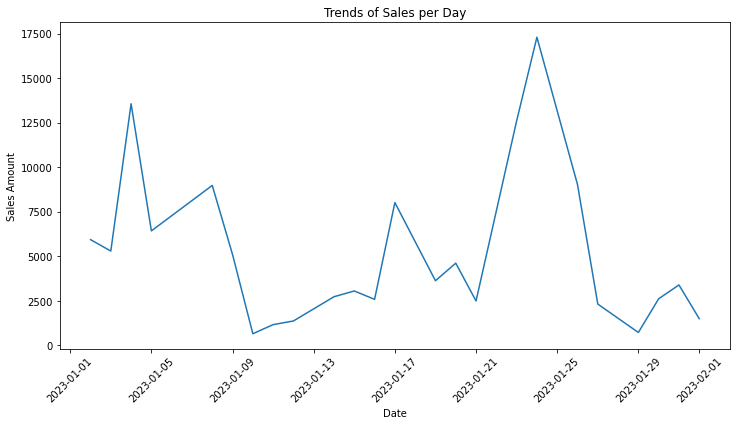

In [69]:
daily_sales = combined_data_payment_completed.groupby('date')['item payment amount(INR) '].sum().reset_index()


matplotlib.rcParams['figure.figsize']=(12,6)
plt.plot(daily_sales['date'], daily_sales['item payment amount(INR) '])
plt.xlabel('Date')
plt.ylabel('Sales Amount')
plt.title('Trends of Sales per Day')
plt.xticks(rotation=45)
plt.show()

In [70]:
combined_data_payment_completed['date']

0     2023-01-02
1     2023-01-02
2     2023-01-02
3     2023-01-02
4     2023-01-02
         ...    
446   2023-01-30
447   2023-01-30
448   2023-01-30
449   2023-01-30
450   2023-01-30
Name: date, Length: 451, dtype: datetime64[ns]

<Figure size 1440x2160 with 0 Axes>

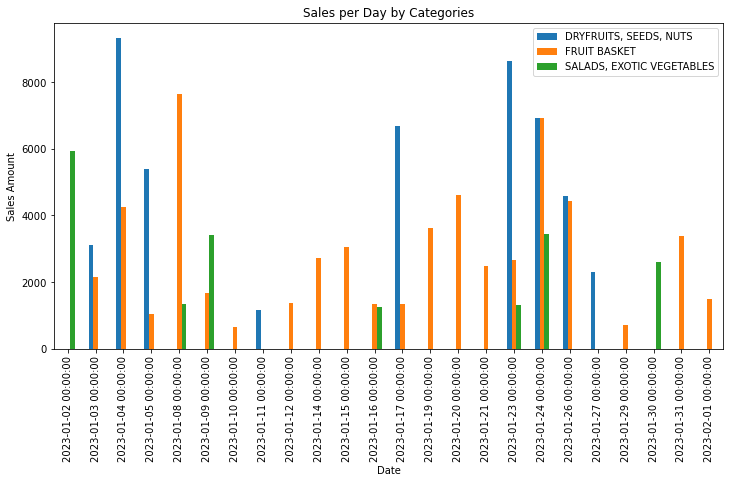

In [71]:
daily_category_sales = combined_data_payment_completed.groupby(['date', 'payment page title'])['item payment amount(INR) '].sum().reset_index()

pivot_data =daily_category_sales.pivot(index='date', columns='payment page title', values='item payment amount(INR) ')

plt.figure(figsize=(20, 30))
pivot_data.plot(kind='bar', stacked=False)
plt.xlabel('Date')
plt.ylabel('Sales Amount')
plt.title('Sales per Day by Categories')
plt.legend()
plt.show()


this trend shows that on 21 june sales where heighest and fruit baskets where sold the most

<Figure size 1440x2160 with 0 Axes>

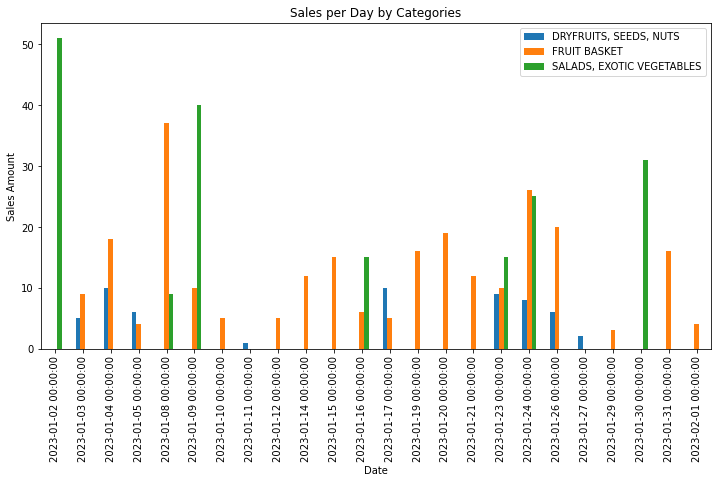

In [72]:
daily_category_sales = combined_data_payment_completed.groupby(['date', 'payment page title'])['item quantity'].sum().reset_index()

pivot_data =daily_category_sales.pivot(index='date', columns='payment page title', values='item quantity')

plt.figure(figsize=(20, 30))
pivot_data.plot(kind='bar', stacked=False)
plt.xlabel('Date')
plt.ylabel('Sales Amount')
plt.title('Sales per Day by Categories')
plt.legend()
plt.show()

This trend shows that on 15 june vegetables where sold in heighest quantity

### Dryfruits

In [73]:
pd.set_option('display.max_colwidth', 200)

In [74]:
dryfruits=combined_data_payment_completed[combined_data_payment_completed['payment page title']=='DRYFRUITS, SEEDS, NUTS']
dryfruits_grouped=dryfruits.groupby('item name')['item payment amount(INR) ','item quantity'].sum().reset_index()


In [75]:
dryfruits_unique_names=dryfruits.groupby('item name')['name'].unique().reset_index()

dryfruits_unique=dryfruits.groupby('item name')['name'].nunique().reset_index()

merged_df = pd.merge(dryfruits_unique,dryfruits_grouped, on='item name', how='left')

merged_df = pd.merge(merged_df,dryfruits_unique_names, on='item name', how='left')

merged_df = merged_df.rename(columns={'name_x': 'buyers count','name_y':'buyers Name','item payment amount(INR) ':'sales amount(INR) ','item quantity':'item sales quantity'})
merged_df

,item name,buyers count,sales amount(INR),item sales quantity,buyers Name
0,a2 gir cow ghee 500ml,1,1050.0,1.0,[namita sahni]
1,brazil nuts 200g,2,1120.0,2.0,"[amirbanu virji, namita sahni]"
2,cashews 500g,5,4100.0,5.0,"[amirbanu virji, indrani jafar, namita sahni, ami gumashta, yogesh thakkar]"
3,dried cranberries 500g,2,1900.0,2.0,"[yogesh thakkar, dinmeher bunshah]"
4,golden rasins 500g,2,1000.0,2.0,"[yogesh thakkar, jasma kapadia]"
5,honey awla 500g,3,1080.0,3.0,"[yogesh thakkar, michelle baptist, ami gumashta]"
6,jumbo anjeer 500g,3,2970.0,3.0,"[yogesh thakkar, jasma kapadia, brinda upadhyaya]"
7,macadamia nuts 200g,1,925.0,1.0,[michelle baptist]
8,makhana 250g,2,975.0,3.0,"[yogesh thakkar, indrani jafar]"
9,mamra badam 500g,4,7120.0,4.0,"[dinmeher bunshah, indrani jafar, namita sahni, ami gumashta]"


Table shows information regarding dry fruits categories item name,buyers count,sales amount,item sales quantity,buyers Name

In [76]:
dryfruit_date=dryfruits.groupby('date')['item payment amount(INR) '].sum().reset_index()
unique_dryfruits=dryfruits.groupby('date')['item name'].unique().reset_index()

merged_df = pd.merge(dryfruit_date,unique_dryfruits, on='date', how='left')
merged_df.sort_values(by='item payment amount(INR) ',ascending=False)

,date,item payment amount(INR),item name
1,2023-01-04,9320.0,"[mamra badam 500g, plain pista 500g, cashews 500g, brazil nuts 200g, prunes 250g, pecan nuts 200g, walnuts 500g, premium almonds 500g, dried cranberries 500g]"
5,2023-01-23,8620.0,"[macadamia nuts 200g, premium jumbo dates 500g, walnuts 500g, honey awla 500g, brazil nuts 200g, a2 gir cow ghee 500ml, cashews 500g, mamra badam 500g]"
6,2023-01-24,6925.0,"[turkish apricot 200g, walnuts 500g, mixed seeds 250g, honey awla 500g, mamra badam 500g, cashews 500g, jumbo anjeer 500g]"
4,2023-01-17,6680.0,"[premium almonds 500g, prunes 250g, jumbo anjeer 500g, golden rasins 500g, turkish apricot 200g, walnuts 500g]"
2,2023-01-05,5390.0,"[cashews 500g, mamra badam 500g, makhana 250g, salted pista 500g, pine nuts 100g]"
7,2023-01-26,4590.0,"[walnuts 500g, premium jumbo dates 500g, prunes 250g, mixed seeds 250g, cashews 500g]"
0,2023-01-03,3125.0,"[dried cranberries 500g, golden rasins 500g, jumbo anjeer 500g, honey awla 500g, makhana 250g]"
8,2023-01-27,2310.0,[walnuts 500g]
3,2023-01-11,1155.0,[walnuts 500g]


Dryfruits sales this month

### Fruits

In [77]:
fruits=combined_data_payment_completed[combined_data_payment_completed['payment page title']=='FRUIT BASKET']
fruits_grouped=fruits.groupby('item name')['item payment amount(INR) ','item quantity'].sum().reset_index()

fruits_unique_names=fruits.groupby('item name')['name'].unique().reset_index()

fruits_unique=fruits.groupby('item name')['name'].nunique().reset_index()

merged_df = pd.merge(fruits_unique,fruits_grouped, on='item name', how='left')

merged_df = pd.merge(merged_df,fruits_unique_names, on='item name', how='left')

merged_df = merged_df.rename(columns={'name_x': 'buyers count','name_y':'buyers Name','item payment amount(INR) ':'sales amount','item quantity':'item sales quantity'})
merged_df

,item name,buyers count,sales amount,item sales quantity,buyers Name
0,avocados 2 pcs,6,7200.0,11.0,"[naina, yogesh thakkar, parul kumar, gayathri, jasma kapadia, dinmeher bunshah, nan]"
1,beauty pear 1kg,5,2400.0,8.0,"[parul kumar, indrani jafar, anubha, jasma kapadia, dinmeher bunshah]"
2,blueberries 2 box,11,9000.0,15.0,"[jaishankar vg, jasma kapadia, rachna jain, anubha, toral patel, gayathri, ushma, indrani jafar, simeen oshidar, dinmeher bunshah, asha gopalakrishnan, nan]"
3,delivery,20,555.0,37.0,"[naina, jaishankar vg, yogesh thakkar, jasma kapadia, rachna jain, mridula gupta, anubha, parul kumar, michelle baptist, kanchan samtani, toral patel, sonavi desai, indrani jafar, shwetha kallaje,..."
4,desi papaya 1pc,7,2100.0,21.0,"[naina, mridula gupta, parul kumar, sonavi desai, shwetha kallaje, ushma, dinmeher bunshah]"
5,elaichi banana 1dozen,3,472.0,4.0,"[parul kumar, dinmeher bunshah, naina]"
6,indian apples 1kg,5,1920.0,8.0,"[naina, mridula gupta, gayathri, dinmeher bunshah, yogesh thakkar]"
7,kiwi box,7,2600.0,13.0,"[jasma kapadia, rachna jain, anubha, toral patel, smita vats sharma, gayathri, dinmeher bunshah]"
8,malta oranges 1kg,8,1776.0,12.0,"[yogesh thakkar, anubha, toral patel, gayathri, sonavi desai, naina, dinmeher bunshah, asha gopalakrishnan]"
9,mosumbi local 1kg,5,1485.0,9.0,"[yogesh thakkar, mridula gupta, gayathri, kanchan samtani, dinmeher bunshah]"


In [78]:
fruits_date=fruits.groupby('date')['item payment amount(INR) '].sum().reset_index()
unique_fruits=fruits.groupby('date')['item name'].unique().reset_index()

merged_df = pd.merge(fruits_date,unique_fruits, on='date', how='left')
merged_df.sort_values(by='item payment amount(INR) ',ascending=False)

,date,item payment amount(INR),item name
3,2023-01-08,7636.0,"[raipur guava 1kg, mosumbi local 1kg, desi papaya 1pc, strawberries 1 box, nagpur oranges 1kg, delivery, indian apples 1kg, pomegranate 1kg, blueberries 2 box, malta oranges 1kg, kiwi box, new zea..."
15,2023-01-24,6931.0,"[new zealand queen apples 1kg, delivery, blueberries 2 box, beauty pear 1kg, avocados 2 pcs, kiwi box, pineapple, red grapes 500g, watermelon, elaichi banana 1dozen, desi papaya 1pc, regular banan..."
12,2023-01-20,4608.0,"[elaichi banana 1dozen, beauty pear 1kg, pomegranate 1kg, sitafal 1kg, new zealand queen apples 1kg, avocados 2 pcs, raipur guava 1kg, delivery, desi papaya 1pc, kiwi box, strawberries 1 box]"
16,2023-01-26,4434.0,"[muskmelon 1pc, desi papaya 1pc, delivery, new zealand queen apples 1kg, strawberries 1 box, malta oranges 1kg, avocados 2 pcs, indian apples 1kg, red grapes 500g, sitafal 1kg, mosumbi local 1kg, ..."
1,2023-01-04,4240.0,"[avocados 2 pcs, nagpur oranges 1kg, delivery, desi papaya 1pc, regular banana 1 doz, pomegranate 1kg, indian apples 1kg, strawberries 1 box, blueberries 2 box, kiwi box, muskmelon 1pc]"
11,2023-01-19,3621.0,"[mosumbi local 1kg, indian apples 1kg, malta oranges 1kg, strawberries 1 box, delivery, avocados 2 pcs, kiwi box, pomegranate 1kg, sitafal 1kg, blueberries 2 box, desi papaya 1pc, regular banana 1..."
18,2023-01-31,3384.0,"[indian apples 1kg, watermelon, elaichi banana 1dozen, avocados 2 pcs, strawberries 1 box, pomegranate 1kg, malta oranges 1kg, delivery, desi papaya 1pc, red grapes 500g, new zealand queen apples ..."
8,2023-01-15,3045.0,"[sitafal 1kg, strawberries 1 box, delivery, kiwi box, avocados 2 pcs, pomegranate 1kg, nagpur oranges 1kg, watermelon, desi papaya 1pc, regular banana 1 doz, indian apples 1kg]"
7,2023-01-14,2723.0,"[beauty pear 1kg, elaichi banana 1dozen, pomegranate 1kg, sitafal 1kg, raipur guava 1kg, nagpur oranges 1kg, delivery, desi papaya 1pc, avocados 2 pcs, new zealand queen apples 1kg]"
14,2023-01-23,2660.0,"[blueberries 2 box, strawberries 1 box, delivery, red grapes 500g, pomegranate 1kg]"


### Vegetables

In [79]:
Vegetables=combined_data_payment_completed[combined_data_payment_completed['payment page title']=='VEGETABLES']
Vegetables_grouped=Vegetables.groupby('item name')['item payment amount(INR) ','item quantity'].sum().reset_index()

Vegetables_unique_names=Vegetables.groupby('item name')['name'].unique().reset_index()

Vegetables_unique=Vegetables.groupby('item name')['name'].nunique().reset_index()

merged_df = pd.merge(Vegetables_unique,Vegetables_grouped, on='item name', how='left')

merged_df = pd.merge(merged_df,Vegetables_unique_names, on='item name', how='left')

merged_df = merged_df.rename(columns={'name_x': 'buyers count','name_y':'buyers Name','item payment amount(INR) ':'sales amount','item quantity':'item sales quantity'})
merged_df

,buyers count,sales amount,item sales quantity,item name,buyers Name


In [80]:
Vegetables_date=Vegetables.groupby('date')['item payment amount(INR) '].sum().reset_index()
unique_Vegetables=Vegetables.groupby('date')['item name'].unique().reset_index()

merged_df = pd.merge(Vegetables_date,unique_Vegetables, on='date', how='left')
merged_df.sort_values(by='item payment amount(INR) ',ascending=False)

,item payment amount(INR),date,item name


### Exotic vegetables

In [81]:
exotic_vegies=combined_data_payment_completed[combined_data_payment_completed['payment page title']=='SALADS, EXOTIC VEGETABLES']
exotic_vegies_grouped=exotic_vegies.groupby('item name')['item payment amount(INR) ','item quantity'].sum().reset_index()

exotic_vegies_unique_names=exotic_vegies.groupby('item name')['name'].unique().reset_index()

exotic_vegies_unique=exotic_vegies.groupby('item name')['name'].nunique().reset_index()

merged_df = pd.merge(exotic_vegies_unique,exotic_vegies_grouped, on='item name', how='left')

merged_df = pd.merge(merged_df,exotic_vegies_unique_names, on='item name', how='left')

merged_df = merged_df.rename(columns={'name_x': 'buyers count','name_y':'buyers Name','item payment amount(INR) ':'sales amount','item quantity':'item sales quantity'})
merged_df

,item name,buyers count,sales amount,item sales quantity,buyers Name
0,avocados 2 pcs,4,2550.0,4.0,"[kanchan samtani, indrani jafar, toral patel, dinmeher bunshah]"
1,baby spinach,4,660.0,6.0,"[indrani jafar, shradha goenka, parvin dumasia, dinmeher bunshah]"
2,babybella mushroom 2packs,3,525.0,3.0,"[toral patel, dinmeher bunshah, kerbi patel]"
3,babycorn 1pack,4,390.0,6.0,"[trupti, michelle baptist, dinmeher bunshah, ashish billimoria]"
4,broccoli 1pc,7,680.0,8.0,"[kerbi patel, jasma kapadia, indrani jafar, naina, shradha goenka, madhu, dinmeher bunshah]"
5,button white mushroom 2packs,4,700.0,5.0,"[jasma kapadia, michelle baptist, dinmeher bunshah, naina]"
6,celery 250g,4,280.0,4.0,"[trupti, naina, dinmeher bunshah, kerbi patel]"
7,cherry tomatoes 250g,7,850.0,10.0,"[kanchan samtani, indrani jafar, naina, shradha goenka, toral patel, parvin dumasia, dinmeher bunshah]"
8,delivery,16,495.0,33.0,"[kerbi patel, trupti, kanchan samtani, meenal, ashish billimoria, jasma kapadia, dinmeher bunshah, michelle baptist, indrani jafar, abha mehta, naina, shradha goenka, madhu, toral patel, parvin du..."
9,green zucchini 1pc,2,170.0,2.0,"[dinmeher bunshah, ashish billimoria]"


In [82]:
exotic_vegies_date=exotic_vegies.groupby('date')['item payment amount(INR) '].sum().reset_index()
unique_exotic_vegies=exotic_vegies.groupby('date')['item name'].unique().reset_index()

merged_df = pd.merge(exotic_vegies_date,unique_exotic_vegies, on='date', how='left')
merged_df.sort_values(by='item payment amount(INR) ',ascending=False)

,date,item payment amount(INR),item name
0,2023-01-02,5930.0,"[broccoli 1pc, delivery, purple cabbage 1 pc, s romaine, red yellow capsicum 1pc, s swiss chard, s curl kale, s spicy mix, imported blueberries 2punnets, iceberg lettuce 1 pc, celery 250g, babycor..."
5,2023-01-24,3443.0,"[purple cabbage 1 pc, japanese cucumber 500g, green zucchini 1pc, s lettuce mix, yellow zucchini 1pc, s aragula, s curl kale, s summercrisp, delivery, cherry tomatoes 250g, s spicy mix, italian ba..."
2,2023-01-09,3405.0,"[s summercrisp, s butterhead, button white mushroom 2packs, italian basil, delivery, s spicy mix, s lettuce mix, cherry tomatoes 250g, red yellow capsicum 1pc, broccoli 1pc, celery 250g, baby spin..."
6,2023-01-30,2608.0,"[babycorn 1pack, s butterhead, s summercrisp, delivery, japanese cucumber 500g, celery 250g, s curl kale, s swiss chard, red yellow capsicum 1pc, babybella mushroom 2packs, s aragula, iceberg lett..."
1,2023-01-08,1338.0,"[cherry tomatoes 250g, red yellow capsicum 1pc, avocados 2 pcs, iceberg lettuce 1 pc, purple cabbage 1 pc, babybella mushroom 2packs, delivery, italian basil]"
4,2023-01-23,1315.0,"[delivery, s lettuce mix, s aragula, cherry tomatoes 250g, baby spinach, s romaine]"
3,2023-01-16,1245.0,"[baby spinach, cherry tomatoes 250g, s aragula, s spicy mix, delivery, s romaine, s lettuce mix, s summercrisp, s butterhead]"


In [83]:
combined_data_payment_completed['name'].unique()

array(['kerbi patel', 'trupti', 'kanchan samtani', 'meenal',
       'ashish billimoria', 'jasma kapadia', 'dinmeher bunshah',
       'michelle baptist', 'indrani jafar', 'naina', 'jaishankar vg',
       'yogesh thakkar', 'rachna jain', 'amirbanu virji', 'mridula gupta',
       'anubha', 'parul kumar', 'toral patel', 'sonavi desai',
       'shwetha kallaje', 'abha mehta', 'shradha goenka', 'madhu',
       'namita sahni', 'ami gumashta', 'brinda upadhyaya',
       'smita vats sharma', 'gayathri', 'ushma', 'parvin dumasia',
       'meher mirza', 'simeen oshidar', 'asha gopalakrishnan', nan],
      dtype=object)

#### Indrani's data 

In [84]:
indrani_data=combined_data_payment_completed[combined_data_payment_completed['name']=='indrani jafar']
indrani_data_grouped=indrani_data.groupby('item name')['item quantity','item payment amount(INR) '].sum().reset_index()
indrani_data_grouped.sort_values(by='item payment amount(INR) ',ascending=False)

,item name,item quantity,item payment amount(INR)
10,mamra badam 500g,1.0,1780.0
20,salted pista 500g,1.0,1450.0
5,cashews 500g,1.0,820.0
0,avocados 2 pcs,1.0,700.0
12,pine nuts 100g,1.0,690.0
9,makhana 250g,2.0,650.0
21,strawberries 1 box,3.0,615.0
3,blueberries 2 box,1.0,600.0
8,japanese cucumber 500g,4.0,320.0
2,beauty pear 1kg,1.0,300.0


In [85]:
indrani_orders = combined_data_payment_completed[(combined_data_payment_completed['name'] == 'indrani jafar')]



indrani_order_dates = indrani_orders.groupby('date')['item name'].unique().reset_index()
indrani_order_dates

,date,item name
0,2023-01-02,"[cherry tomatoes 250g, avocados 2 pcs, delivery, broccoli 1pc, japanese cucumber 500g]"
1,2023-01-05,"[cashews 500g, mamra badam 500g, makhana 250g, salted pista 500g, pine nuts 100g]"
2,2023-01-09,"[beauty pear 1kg, delivery, strawberries 1 box, nagpur oranges 1kg, raipur guava 1kg, broccoli 1pc, baby spinach, s romaine, s aragula, purple cabbage 1 pc, s butterhead, red yellow capsicum 1pc, ..."
3,2023-01-23,"[blueberries 2 box, strawberries 1 box, delivery, red grapes 500g]"


In [86]:
combined_data_payment_completed[combined_data_payment_completed['name']=='yogesh thakkar']

,payment page title,payment date,order_id,item name,item amount,item quantity,item payment amount(INR),total payment amount,email,date,time,year,day,month,name
60,FRUIT BASKET,03/01/2023 22:01:07,order_Kzls1e5ZIhuMrt,strawberries 1 box,215.0,2.0,430.0,2163.0,yogesh.thakkar@gmail.com,2023-01-03,22:01:07,2023,3,1,yogesh thakkar
61,FRUIT BASKET,03/01/2023 22:01:07,order_Kzls1e5ZIhuMrt,delivery,15.0,1.0,15.0,2163.0,yogesh.thakkar@gmail.com,2023-01-03,22:01:07,2023,3,1,yogesh thakkar
62,FRUIT BASKET,03/01/2023 22:01:07,order_Kzls1e5ZIhuMrt,sitafal 1kg,260.0,1.0,260.0,2163.0,yogesh.thakkar@gmail.com,2023-01-03,22:01:07,2023,3,1,yogesh thakkar
63,FRUIT BASKET,03/01/2023 22:01:07,order_Kzls1e5ZIhuMrt,mosumbi local 1kg,165.0,1.0,165.0,2163.0,yogesh.thakkar@gmail.com,2023-01-03,22:01:07,2023,3,1,yogesh thakkar
64,FRUIT BASKET,03/01/2023 22:01:07,order_Kzls1e5ZIhuMrt,avocados 2 pcs,650.0,1.0,650.0,2163.0,yogesh.thakkar@gmail.com,2023-01-03,22:01:07,2023,3,1,yogesh thakkar
65,FRUIT BASKET,03/01/2023 22:01:07,order_Kzls1e5ZIhuMrt,pomegranate 1kg,350.0,1.0,350.0,2163.0,yogesh.thakkar@gmail.com,2023-01-03,22:01:07,2023,3,1,yogesh thakkar
66,FRUIT BASKET,03/01/2023 22:01:07,order_Kzls1e5ZIhuMrt,nagpur oranges 1kg,145.0,1.0,145.0,2163.0,yogesh.thakkar@gmail.com,2023-01-03,22:01:07,2023,3,1,yogesh thakkar
67,FRUIT BASKET,03/01/2023 22:01:07,order_Kzls1e5ZIhuMrt,malta oranges 1kg,148.0,1.0,148.0,2163.0,yogesh.thakkar@gmail.com,2023-01-03,22:01:07,2023,3,1,yogesh thakkar
85,"DRYFRUITS, SEEDS, NUTS",03/01/2023 21:58:12,order_Kzlosb1Dp5Z33k,dried cranberries 500g,950.0,1.0,950.0,3125.0,yogesh.thakkar@gmail.com,2023-01-03,21:58:12,2023,3,1,yogesh thakkar
86,"DRYFRUITS, SEEDS, NUTS",03/01/2023 21:58:12,order_Kzlosb1Dp5Z33k,golden rasins 500g,500.0,1.0,500.0,3125.0,yogesh.thakkar@gmail.com,2023-01-03,21:58:12,2023,3,1,yogesh thakkar


# END